In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
rand_seed = 42
roll_number = 2021101113
L = ((roll_number%5)+1)*100
print(L)
p_values = [0.3,0.4,0.7]

400


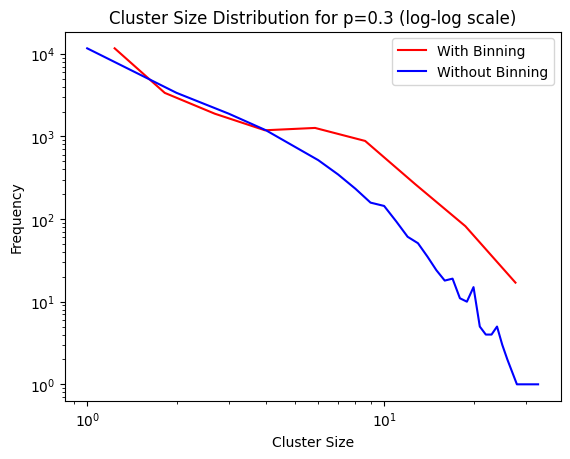

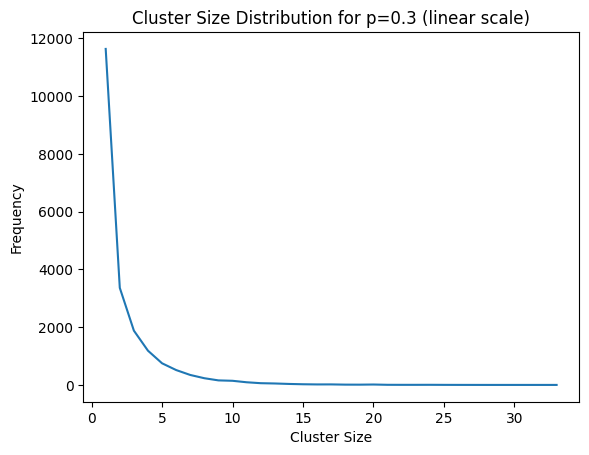

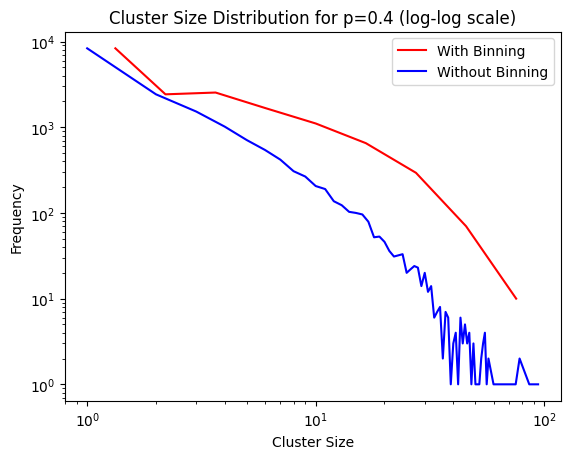

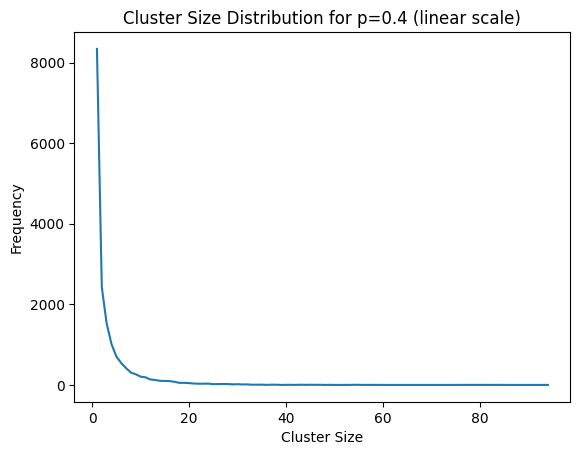

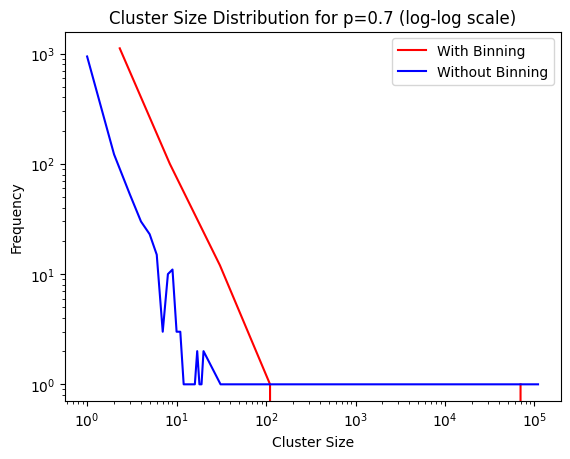

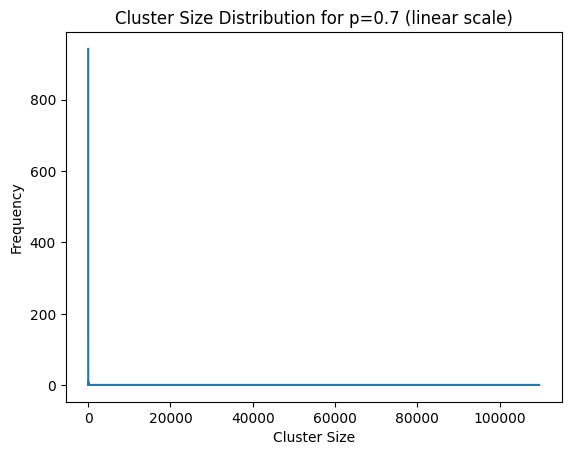

In [2]:
def compute_cluster_sizes(lattice):
  labels, _ = label(lattice)

  label_list = labels.ravel()
  cluster_sizes = np.bincount(label_list)
  cluster_sizes = cluster_sizes[1:]

  return cluster_sizes

def plot_distribution(p, for_critical=False):
  np.random.seed(rand_seed)
  lattice = np.random.rand(L, L) < p

  cluster_sizes = compute_cluster_sizes(lattice)

  logbins = np.logspace(0, np.log10(max(cluster_sizes)), num=10)
  widths = (logbins[1:] - logbins[:-1])
  counts, edges = np.histogram(cluster_sizes, bins=logbins)
  centers = (edges[:-1] + edges[1:]) / 2

  unique_sizes, freq = np.unique(cluster_sizes, return_counts=True)

  plt.loglog(centers, counts, label=f'With Binning', color='red')
  plt.loglog(unique_sizes, freq, label=f'Without Binning', color='blue')
  
  plt.title(f'Cluster Size Distribution for p={p} (log-log scale)')
  plt.xlabel('Cluster Size')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

  plt.plot(unique_sizes, freq, label=f'p={p}')
  plt.title(f'Cluster Size Distribution for p={p} (linear scale)')
  plt.xlabel('Cluster Size')
  plt.ylabel('Frequency')
  plt.show()

  if(for_critical):
    x = np.log10(unique_sizes)
    y = np.log10(freq)

    slope = np.polyfit(x, y, 1)[0]

    print('For p = p_critical, exponent is: ', slope)

for p in p_values:
  plot_distribution(p)

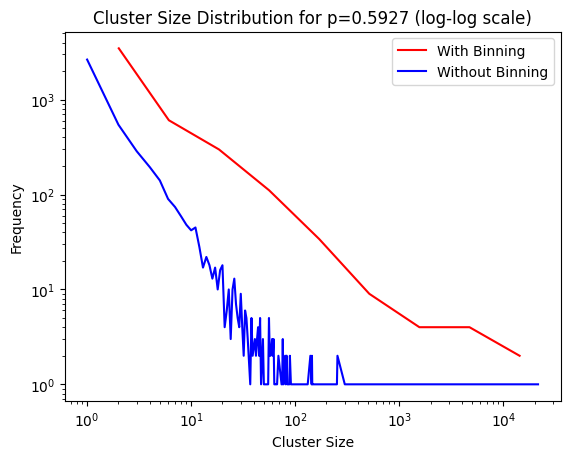

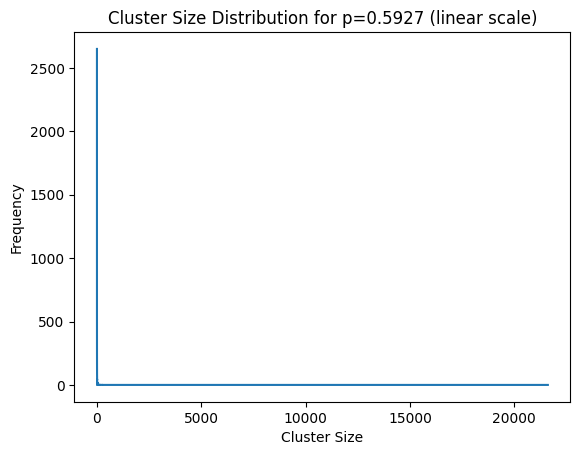

For p = p_critical, exponent is:  -0.680597677361391


In [3]:
plot_distribution(0.5927, for_critical=True)